**Autor:** [Boris Timko](mailto:5346398@upjs.sk)

**Podporné materiály k bakalárskej práci <i>VLASTNOSTI A VYUŽITIE STOCHASTICKEJ
DOMINANCIE</i>**

***

<br>

**<font size=10 color=brown> Stochasticka dominancia, príklady k nutným a postačujúcim podmienkam </font>**

<br>

In [ ]:
# načítanie balíkov
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.stats import rv_discrete


1. **Definujume dve diskrétne investičné rozdelenia**  
   - **F**: hodnoty $\{-5,0,6,8,12\}$ s pravdepodobnosťami $\{0.2,0.2,0.2,0.2,0.2\}$  
   - **G**: hodnoty $\{-10,0,10\}$ s pravdepodobnosťami $\{0.1,0.7,0.2\}$  

2. **Vyhodnoťime**:  
   - či platí **FSD** (prvý stupeň): $F(x)\le G(x)$ pre všetky $x$  
   - či platí **SSD** (druhý stupeň): $J_F(x)\le J_G(x)$ pre všetky $x$  



--- Vstupná tabuľka rozdelení (F vs G) ---
Investícia   x  P(x)  CDF
         F  -5   0.2  0.2
         F   0   0.2  0.4
         F   6   0.2  0.6
         F   8   0.2  0.8
         F  12   0.2  1.0
         G -10   0.1  0.1
         G   0   0.7  0.8
         G  10   0.2  1.0

--- Tabuľka integrálov (CDF, I2, JF, JG) ---
  x  CDF_F  CDF_G  I2(x)  J_F(x)  J_G(x)
-11    0.0    0.0    0.0     0.0     0.0
-10    0.0    0.1    0.0     0.0     0.0
 -5    0.2    0.1    0.5     0.0     0.5
  0    0.4    0.8    0.0     1.0     1.0
  6    0.6    0.8    2.4     3.4     5.8
  8    0.8    0.8    2.8     4.6     7.4
 10    0.8    1.0    2.8     6.2     9.0
 12    1.0    1.0    3.2     7.8    11.0


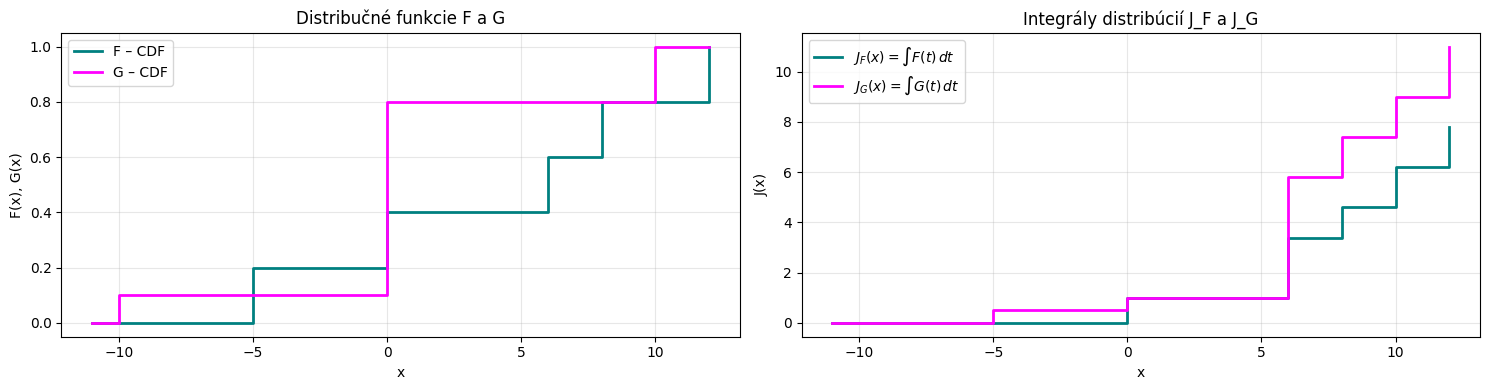

In [ ]:
def ssd_tables(xF, pF, xG, pG):
    """vstupná tabuľka + výpočet CDF a I2 pre SSD a podklad pre integrály distribúcií"""
    xF, pF, xG, pG = map(np.asarray, (xF, pF, xG, pG))

    # vstupná tabuľka
    inp = (pd.concat([
            pd.DataFrame({'Investícia': 'F', 'x': xF, 'P(x)': pF}),
            pd.DataFrame({'Investícia': 'G', 'x': xG, 'P(x)': pG})
        ])
        .sort_values(['Investícia','x'])
        .reset_index(drop=True)
    )
    inp['CDF'] = inp.groupby('Investícia')['P(x)'].cumsum()

    # mriežka
    grid = np.sort(np.unique(np.concatenate((xF, xG))))
    grid = np.hstack((grid[0]-1, grid))       # začneme trochu pred min

    # Ditribučné funkcie
    F = np.array([pF[xF <= t].sum() for t in grid])
    G = np.array([pG[xG <= t].sum() for t in grid])

    dx = np.diff(grid)

    # I2(x) = ∫ (G-F) dt pre SSD kontrolu
    I2 = np.hstack(([0], np.cumsum((G[:-1] - F[:-1]) * dx)))

    # JF(x)=∫ F(t)dt, JG(x)=∫ G(t)dt
    JF = np.hstack(([0], np.cumsum(F[:-1] * dx)))
    JG = np.hstack(([0], np.cumsum(G[:-1] * dx)))

    tab_integrals = pd.DataFrame({
        'x': grid,
        'CDF_F': F,
        'CDF_G': G,
        'I2(x)': I2,
        'J_F(x)': JF,
        'J_G(x)': JG
    })

    return inp, tab_integrals, grid, F, G, I2, JF, JG

# ----- príkladové parametre -----
xF = [-5, 0, 6, 8, 12];    pF = [0.2]*5
xG = [-10, 0, 10];         pG = [0.1, 0.7, 0.2]

tab_inp, tab_int, grid, F_cdf, G_cdf, I2, JF, JG = ssd_tables(xF, pF, xG, pG)

# ----- výpisy -----
print('\n--- Vstupná tabuľka rozdelení (F vs G) ---')
print(tab_inp.to_string(index=False))

print('\n--- Tabuľka integrálov (CDF, I2, JF, JG) ---')
print(tab_int.to_string(index=False))

# ----- Grafy -----
# (1) CDF
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.step(grid, F_cdf, color='teal',where='post', lw=2, label='F – CDF')
plt.step(grid, G_cdf,color='magenta', where='post', lw=2, label='G – CDF')
plt.title('Distribučné funkcie F a G'); plt.xlabel('x'); plt.ylabel('F(x), G(x)')
plt.ylim(-0.05,1.05); plt.grid(alpha=0.3); plt.legend()

# (2) Integrály distribúcií:
plt.subplot(1,2,2)
plt.step(grid, JF,color='teal', where='post', lw=2, label=r'$J_F(x)=\int F(t)\,dt$')
plt.step(grid, JG,color='magenta', where='post', lw=2, label=r'$J_G(x)=\int G(t)\,dt$')
plt.title('Integrály distribúcií J_F a J_G'); plt.xlabel('x'); plt.ylabel('J(x)')
plt.grid(alpha=0.3); plt.legend()

plt.tight_layout()
plt.show()


1. **Vstupná tabuľka** a graf distribučných funkcií ukázal, že distribučné funkcie F a G sa predbiehaju na rôznych úsekoch a tým padom FSD neplatí ani v jednom smere, musíme zistiť SSD  

2. **SSD**  
   Na grafe integralov distribučných funkcií vidíme, že  
   $
     J_F(x)\le J_G(x)\quad\forall x.
   $
   To znamená, že obsah ploch pod distrbučnými funkciami(CDF) pre $ G$  sú vždy väčšie než pre $ F$ .  
   **Záver:** $F$  SSD-dominuje $G$.

## Porovnanie očakávaných hodnôt a test FSD

**Nutná podmienka**  
Ak $X \succeq_1 Y$ (prvý stupeň stochastickej dominancie), potom  
$
\mathbb{E}[X]\;\ge\;\mathbb{E}[Y].
$

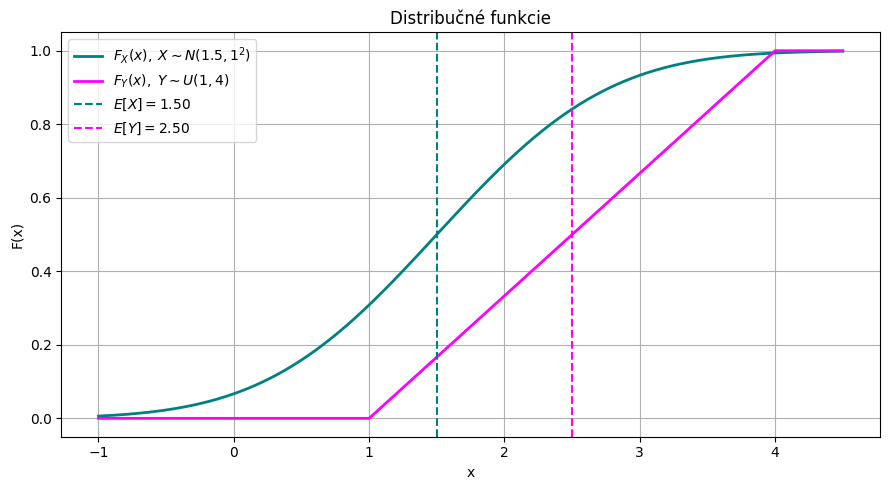

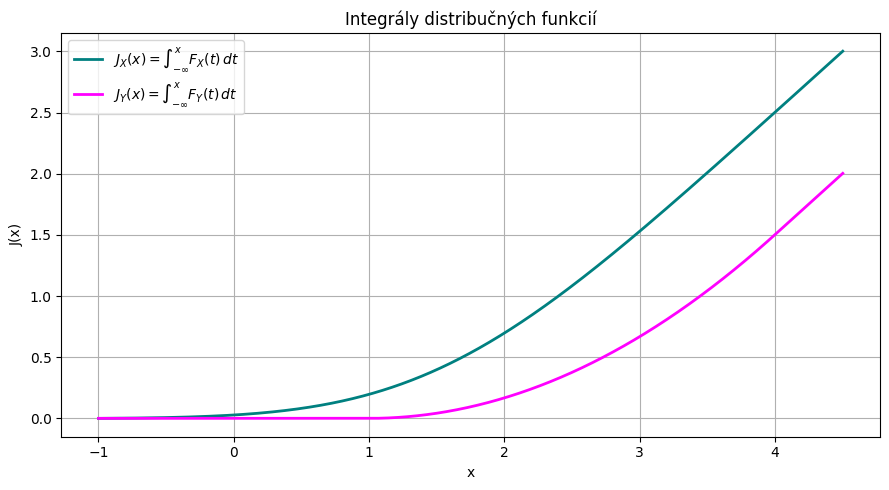

∫(F_X-F_Y) ds = +0.998391
E[X]=1.5018   E[Y]=2.5019
E[X]≥E[Y] = False
E[Y]≥E[X] = True


In [ ]:
# --- parametre
mu, sigma = 1.5, 1     # normálne N(mu, sigma²)
a, b = 1, 4            # rovnomerné U(a, b)

# mriežka
x = np.linspace(-1, 4.5, 1000)
dx = x[1] - x[0]

# hustoty a CDF
pdf_x = norm.pdf(x, loc=mu, scale=sigma)
cdf_x = norm.cdf(x, loc=mu, scale=sigma)

L = b - a
pdf_y = uniform.pdf(x, loc=a, scale=L)
cdf_y = uniform.cdf(x, loc=a, scale=L)

# SSD krivka: S(t) = ∫ (F_X - F_Y) ds
S = np.cumsum((cdf_x - cdf_y) * dx)
I_tot = S[-1]

#  integrály distribúcií: J_X, J_Y
JX = np.cumsum(cdf_x * dx)
JY = np.cumsum(cdf_y * dx)

# očakávané hodnoty
E_x = np.trapezoid(x * pdf_x, x)  # = mu
E_y = np.trapezoid(x * pdf_y, x)  # = (a+b)/2

# --- graf CDF
plt.figure(figsize=(9, 5))
plt.plot(x, cdf_x,   label=rf"$F_X(x),\;X\sim N({mu},{sigma}^2)$",color='teal' ,lw=2)
plt.plot(x, cdf_y,   label=rf"$F_Y(x),\;Y\sim U({a},{b})$", color='magenta', lw=2)
plt.axvline(E_x, color='teal',   ls='--', label=rf"$E[X]={E_x:.2f}$")
plt.axvline(E_y, color='magenta', ls='--', label=rf"$E[Y]={E_y:.2f}$")
plt.title("Distribučné funkcie")
plt.xlabel("x"); plt.ylabel("F(x)")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# --- graf integrálov distribúcií
plt.figure(figsize=(9, 5))
plt.plot(x, JX, label=r"$J_X(x)=\int_{-\infty}^xF_X(t)\,dt$", color='teal',lw=2)
plt.plot(x, JY, label=r"$J_Y(x)=\int_{-\infty}^xF_Y(t)\,dt$",color='magenta', lw=2)
plt.title("Integrály distribučných funkcií")
plt.xlabel("x"); plt.ylabel("J(x)")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# numerické hodnoty
print(f"∫(F_X-F_Y) ds = {I_tot:+.6f}")
print(f"E[X]={E_x:.4f}   E[Y]={E_y:.4f}")
print(f"E[X]≥E[Y] = {E_x >= E_y}")
print(f"E[Y]≥E[X] = {E_y >= E_x}")

# Príklad nutnej podmienky pre prvý stupeň stochastickej dominancie (FSD)

V tomto príklade porovnáme dve diskrétne rozdelenia $X$ a $Y$, kde
- $X$ nadobúda hodnoty $\{1,2,3\}$ s pravdepodobnosťou 1/3,
- $Y$ nadobúda hodnoty $\{0,2,4\}$ s pravdepodobnosťou 1/3.

Nutná podmienka FSD hovorí, že $\min(X)\ge\min(Y)$. Ak táto neplatí, FSD je okamžite vylúčená.

min(X) = 1, min(Y) = 0
Nutná podmienka FSD (min(X) ≥ min(Y)) platí – FSD X ≽₁ Y.


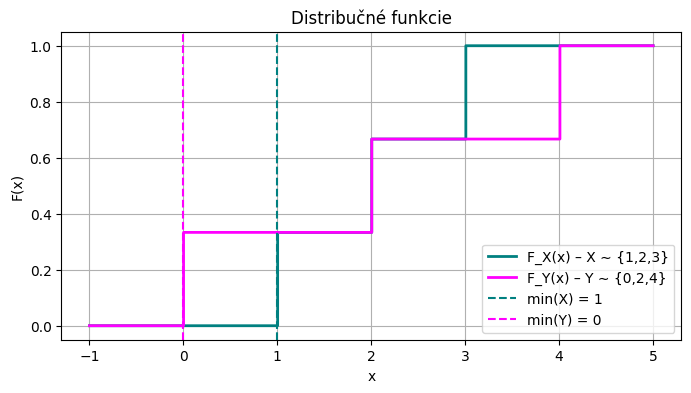

In [ ]:
# --- Definícia dvoch diskrétnych rozdelení ---
# Náhodná premenná X nadobúda hodnoty 1, 2, 3 s pravdepodobnosťou 1/3
x_hodnoty = np.array([1, 2, 3])
p_x = np.array([1/3, 1/3, 1/3])

# Náhodná premenná Y nadobúda hodnoty 0, 2, 4 s pravdepodobnosťou 1/3
y_hodnoty = np.array([0, 2, 4])
p_y        = np.array([1/3, 1/3, 1/3])

dist_X = rv_discrete(values=(x_hodnoty, p_x))
dist_Y = rv_discrete(values=(y_hodnoty, p_y))

# --- Kontrola nutnej podmienky FSD: min(X) ≥ min(Y) ---
min_X = x_hodnoty.min()
min_Y = y_hodnoty.min()

print(f"min(X) = {min_X}, min(Y) = {min_Y}")
if min_X >= min_Y:
    print("Nutná podmienka FSD (min(X) ≥ min(Y)) platí – FSD X ≽₁ Y.")
else:
    print("Nutná podmienka FSD (min(Y) ≥ min(X)) platí – FSD Y ≽₁ X .")

# --- Graf empirických kumulatívnych distribučních funkcií (CDF) ---
grid = np.linspace(-1, 5, 600)
F_X  = dist_X.cdf(grid)
F_Y  = dist_Y.cdf(grid)

plt.figure(figsize=(8, 4))
plt.step(grid, F_X, where='post', color='teal',label='F_X(x) – X ∼ {1,2,3}', lw=2)
plt.step(grid, F_Y, where='post', color='magenta',label='F_Y(x) – Y ∼ {0,2,4}', lw=2)
plt.axvline(min_X, color='teal',   ls='--', label=f'min(X) = {min_X}')
plt.axvline(min_Y, color='magenta', ls='--', label=f'min(Y) = {min_Y}')
plt.title('Distribučné funkcie')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()


min(X) = 1.0, min(Y) = 2.0
min(X) = 1.0, min(Y) = 2.0
Nutná podmienka FSD (min(Y) ≥ min(X)) platí – FSD Y ≽₁ X .


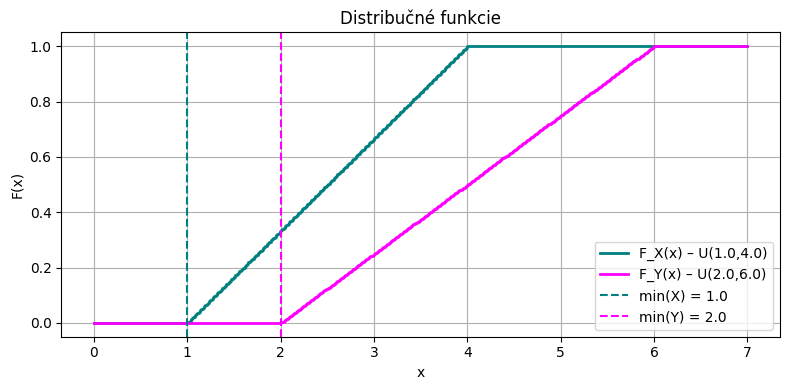

X ≽₁ Y (X FSD-dominuje Y): False
Y ≽₁ X (Y FSD-dominuje X): True


In [ ]:
# ------------------------------------------------------------
# Nové spojité rozdelenia s rôznymi minimami (obidve > 0)
# ------------------------------------------------------------
# X ~ Uniform(a_X, b_X), Y ~ Uniform(a_Y, b_Y)
a_X, b_X = 1.0, 4.0   # min(X)=1.0
a_Y, b_Y = 2.0, 6.0   # min(Y)=2.0

# ------------------------------------------------------------
# Nutná podmienka FSD: min(X) ≥ min(Y)?
# ------------------------------------------------------------
min_X = a_X
min_Y = a_Y
print(f"min(X) = {min_X}, min(Y) = {min_Y}")
print(f"min(X) = {min_X}, min(Y) = {min_Y}")
if min_X >= min_Y:
    print("Nutná podmienka FSD (min(X) ≥ min(Y)) platí – FSD X ≽₁ Y.")
else:
    print("Nutná podmienka FSD (min(Y) ≥ min(X)) platí – FSD Y ≽₁ X .")

# ------------------------------------------------------------
# Príprava mriežky pre CDF
# ------------------------------------------------------------
x = np.linspace(0, 7, 500)
F_X = uniform.cdf(x, loc=a_X, scale=b_X - a_X)
F_Y = uniform.cdf(x, loc=a_Y, scale=b_Y - a_Y)

# ------------------------------------------------------------
# Vykreslenie kumulatívnych distribučných funkcií (CDF)
# ------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.step(x, F_X, where='post',color='teal', label=f'F_X(x) – U({a_X},{b_X})', lw=2)
plt.step(x, F_Y, where='post',color='magenta', label=f'F_Y(x) – U({a_Y},{b_Y})', lw=2)
plt.axvline(min_X, color='teal',   ls='--', label=f'min(X) = {min_X}')
plt.axvline(min_Y, color='magenta', ls='--', label=f'min(Y) = {min_Y}')
plt.title('Distribučné funkcie')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Overenie FSD: F_X(x) ≤ F_Y(x) pre všetky x?
# ------------------------------------------------------------
fsd_X_dominates_Y = np.all(F_X <= F_Y + 1e-8)
fsd_Y_dominates_X = np.all(F_Y <= F_X + 1e-8)

print("X ≽₁ Y (X FSD-dominuje Y):", fsd_X_dominates_Y)
print("Y ≽₁ X (Y FSD-dominuje X):", fsd_Y_dominates_X)


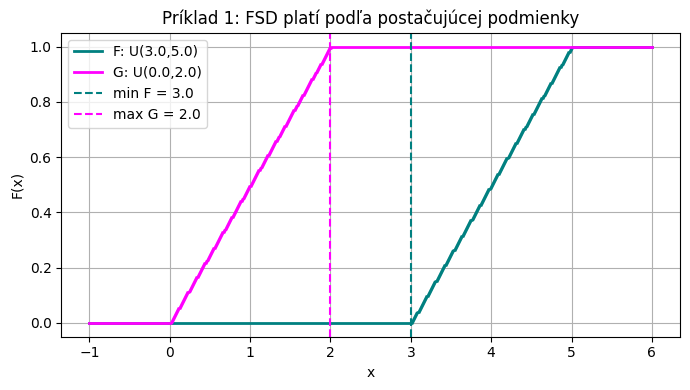

Postačujúca podmienka (min F ≥ max G): True
FSD test (F_X ≤ F_G pre všetky x): True

------------------------------------------------------------



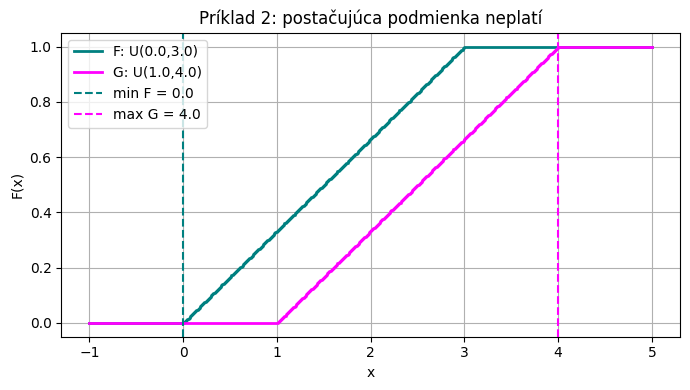

Postačujúca podmienka (min F ≥ max G): False
FSD test (F_X ≤ F_G pre všetky x): False


In [ ]:
# -----------------------------------------------------------------
# Príklad 1: Uniformné rozdelenia, kde platí postačujúca podmienka
# -----------------------------------------------------------------
# F ~ U[3, 5], G ~ U[0, 2]
a_F1, b_F1 = 3.0, 5.0
a_G1, b_G1 = 0.0, 2.0

# Sufficient podmienka FSD: min F ≥ max G?
min_F1, max_G1 = a_F1, b_G1
podmienka1 = (min_F1 >= max_G1)

# Mriežka pre CDF
x1 = np.linspace(-1, 6, 500)
F1 = uniform.cdf(x1, loc=a_F1, scale=b_F1 - a_F1)
G1 = uniform.cdf(x1, loc=a_G1, scale=b_G1 - a_G1)

# Graf CDF
plt.figure(figsize=(7,4))
plt.step(x1, F1, where='post',color='teal', label=f'F: U({a_F1},{b_F1})', lw=2)
plt.step(x1, G1, where='post',color='magenta',label=f'G: U({a_G1},{b_G1})', lw=2)
plt.axvline(min_F1, color='teal',   ls='--', label=f'min F = {min_F1}')
plt.axvline(max_G1, color='magenta', ls='--', label=f'max G = {max_G1}')
plt.title('Príklad 1: FSD platí podľa postačujúcej podmienky')
plt.xlabel('x'); plt.ylabel('F(x)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

print(f"Postačujúca podmienka (min F ≥ max G): {podmienka1}")
print("FSD test (F_X ≤ F_G pre všetky x):", np.all(F1 <= G1 + 1e-8))
print("\n" + "-"*60 + "\n")

# -----------------------------------------------------------------
# Príklad 2: Uniformné rozdelenia, kde postačujúca podmienka neplatí
# -----------------------------------------------------------------
# F ~ U[0, 3], G ~ U[1, 4]
a_F2, b_F2 = 0.0, 3.0
a_G2, b_G2 = 1.0, 4.0

min_F2, max_G2 = a_F2, b_G2
podmienka2 = (min_F2 >= max_G2)

# Mriežka pre CDF
x2 = np.linspace(-1, 5, 500)
F2 = uniform.cdf(x2, loc=a_F2, scale=b_F2 - a_F2)
G2 = uniform.cdf(x2, loc=a_G2, scale=b_G2 - a_G2)

# Graf CDF
plt.figure(figsize=(7,4))
plt.step(x2, F2, where='post',color='teal', label=f'F: U({a_F2},{b_F2})', lw=2)
plt.step(x2, G2, where='post',color='magenta', label=f'G: U({a_G2},{b_G2})', lw=2)
plt.axvline(min_F2, color='teal',   ls='--', label=f'min F = {min_F2}')
plt.axvline(max_G2, color='magenta', ls='--', label=f'max G = {max_G2}')
plt.title('Príklad 2: postačujúca podmienka neplatí')
plt.xlabel('x'); plt.ylabel('F(x)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

print(f"Postačujúca podmienka (min F ≥ max G): {podmienka2}")
print("FSD test (F_X ≤ F_G pre všetky x):", np.all(F2 <= G2 + 1e-8))
